In [1]:
#随机森林的使用

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

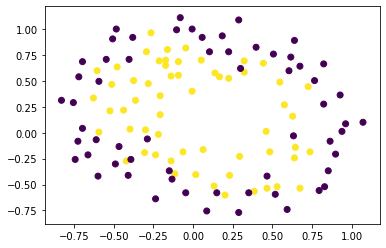

In [3]:
#载入数据

data = np.genfromtxt('LR-testSet2.txt', delimiter = ',')
x_data = data[:,:-1]
y_data = data[:,-1]

plt.scatter(x_data[:,0], x_data[:,1],c=y_data)
plt.show()

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data, test_size = 0.5)

In [25]:
def plot_c(model):
    x_min, x_max =x_data[:, 0].min()-1, x_data[:, 0].max()+1
    y_min, y_max =x_data[:, 1].min()-1, x_data[:, 1].max()+1
    #生成网格矩阵
    xx,yy =np.meshgrid(np.arange(x_min, x_max, 0.02),
                                np.arange(y_min,y_max,0.02))
    # print(xx.shape)
    # print(xx.ravel().shape)

    z =model.predict(np.c_[xx.ravel(), yy.ravel()])
    # print(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape)

    cs = plt.contourf(xx,yy,z)
    plt.scatter(x_test[:,0],x_test[:,1],c=y_test)
    plt.show()

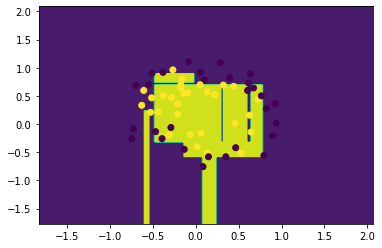

0.7457627118644068

In [26]:
dtree = tree.DecisionTreeClassifier()
dtree.fit(x_train,y_train)
plot_c(dtree)
dtree.score(x_test,y_test)

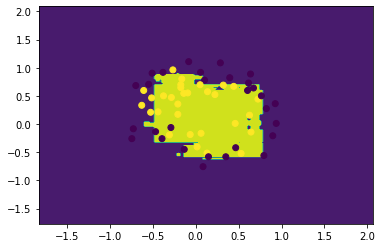

0.7796610169491526

In [27]:
RF = RandomForestClassifier(n_estimators = 50)
RF.fit(x_train, y_train)
plot_c(RF)
RF.score(x_test, y_test)